**Import library need by the project**

In [2]:
# Basic data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries - sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# XGBoost
import xgboost as xgb

# Deep learning - TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Shap Analysis
import shap

2025-03-30 22:00:53.303850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Read data from CSV and display the summary**

In [3]:
wines = pd.read_csv('wine_data.csv', sep=',')

wines.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
5,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
6,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
7,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
8,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
9,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


In [4]:
wines.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,53981.000000,53983.000000,53987.000000,53991.000000,53992.000000,53994.000000,53994.000000,53994.000000,53981.000000,53990.000000,53994.000000,53994.000000
mean,8.810629,0.661865,0.613222,20.733765,0.146368,92.544423,185.255147,1.006522,3.181488,0.837969,10.979667,5.930400
std,2.395040,0.396537,0.386675,19.215359,0.118897,76.056337,102.335831,0.013507,0.170283,0.401059,1.239853,1.663418
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.900000,0.295000,0.300000,2.800000,0.047000,27.000000,106.000000,0.994880,3.060000,0.500000,10.000000,5.000000
50%,8.210000,0.600000,0.500000,12.750000,0.097000,61.200000,171.000000,1.002718,3.170000,0.730000,10.998413,6.000000
75%,10.550000,0.995000,0.940000,38.900000,0.231000,158.700000,266.200000,1.017800,3.290000,1.160000,11.900000,7.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**Observe the variable type. quality could be decrete variable and rest variable could be continuous**

In [5]:
for i, col in enumerate(list(wines.columns.values)):
    print("Column name: {}, type: {}".format(col, wines[col].dtype))

Column name: fixed_acidity, type: float64
Column name: volatile_acidity, type: float64
Column name: citric_acid, type: float64
Column name: residual_sugar, type: float64
Column name: chlorides, type: float64
Column name: free_sulfur_dioxide, type: float64
Column name: total_sulfur_dioxide, type: float64
Column name: density, type: float64
Column name: pH, type: float64
Column name: sulphates, type: float64
Column name: alcohol, type: float64
Column name: quality, type: int64


**We do not want to have empty data, so check if any column misses data**

In [6]:
wines.isnull().any().any()

True

**Looks like dataset has empty row from the above check, we drop empty rows and check again**

In [7]:
wines = wines.dropna()

wines.isnull().any().any()

False

In [8]:
print("Data count after droping NaN: {}".format(len(wines)))

Data count after droping NaN: 53945


**Based on the histogram, quality is from 3 to 9 and we have 3000 records for each quality level**

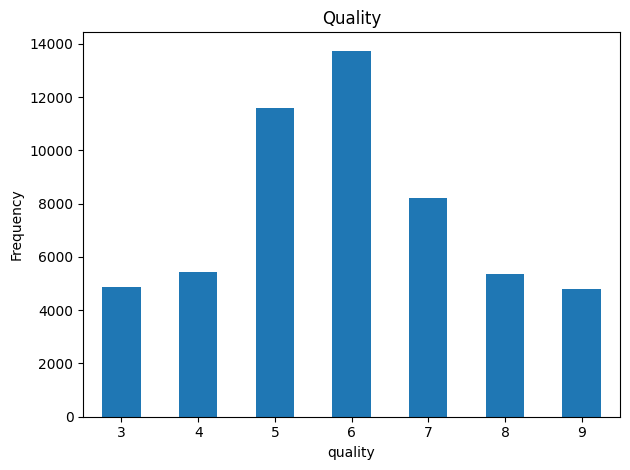

In [9]:
wines['quality'].value_counts().sort_index().plot(kind='bar', title = 'Quality') 

plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Heatmap to help us to understand correlation. From here, we can understand alcohol is important for quality. The correlation between quality and pH is -0.0032 and some of variables have correlation less than 0.05. Consider not remove to many features, we can consider build model without those variable which are less than 0.045.**

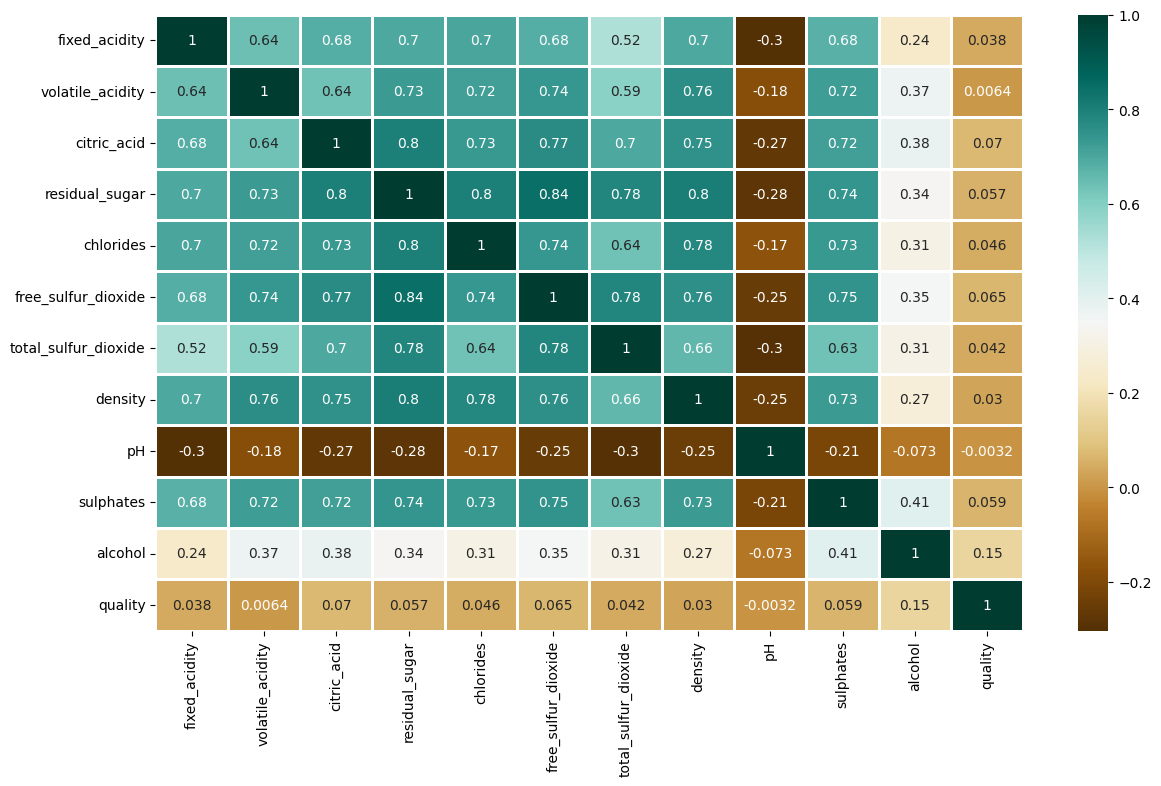

In [10]:
plt.figure(figsize=(14, 8))
sns.heatmap(wines.corr(), cmap = 'BrBG', linewidths = 2, annot = True)
plt.show()

**We want to observe features if any one is much skewed since skewness could affect model prediction**

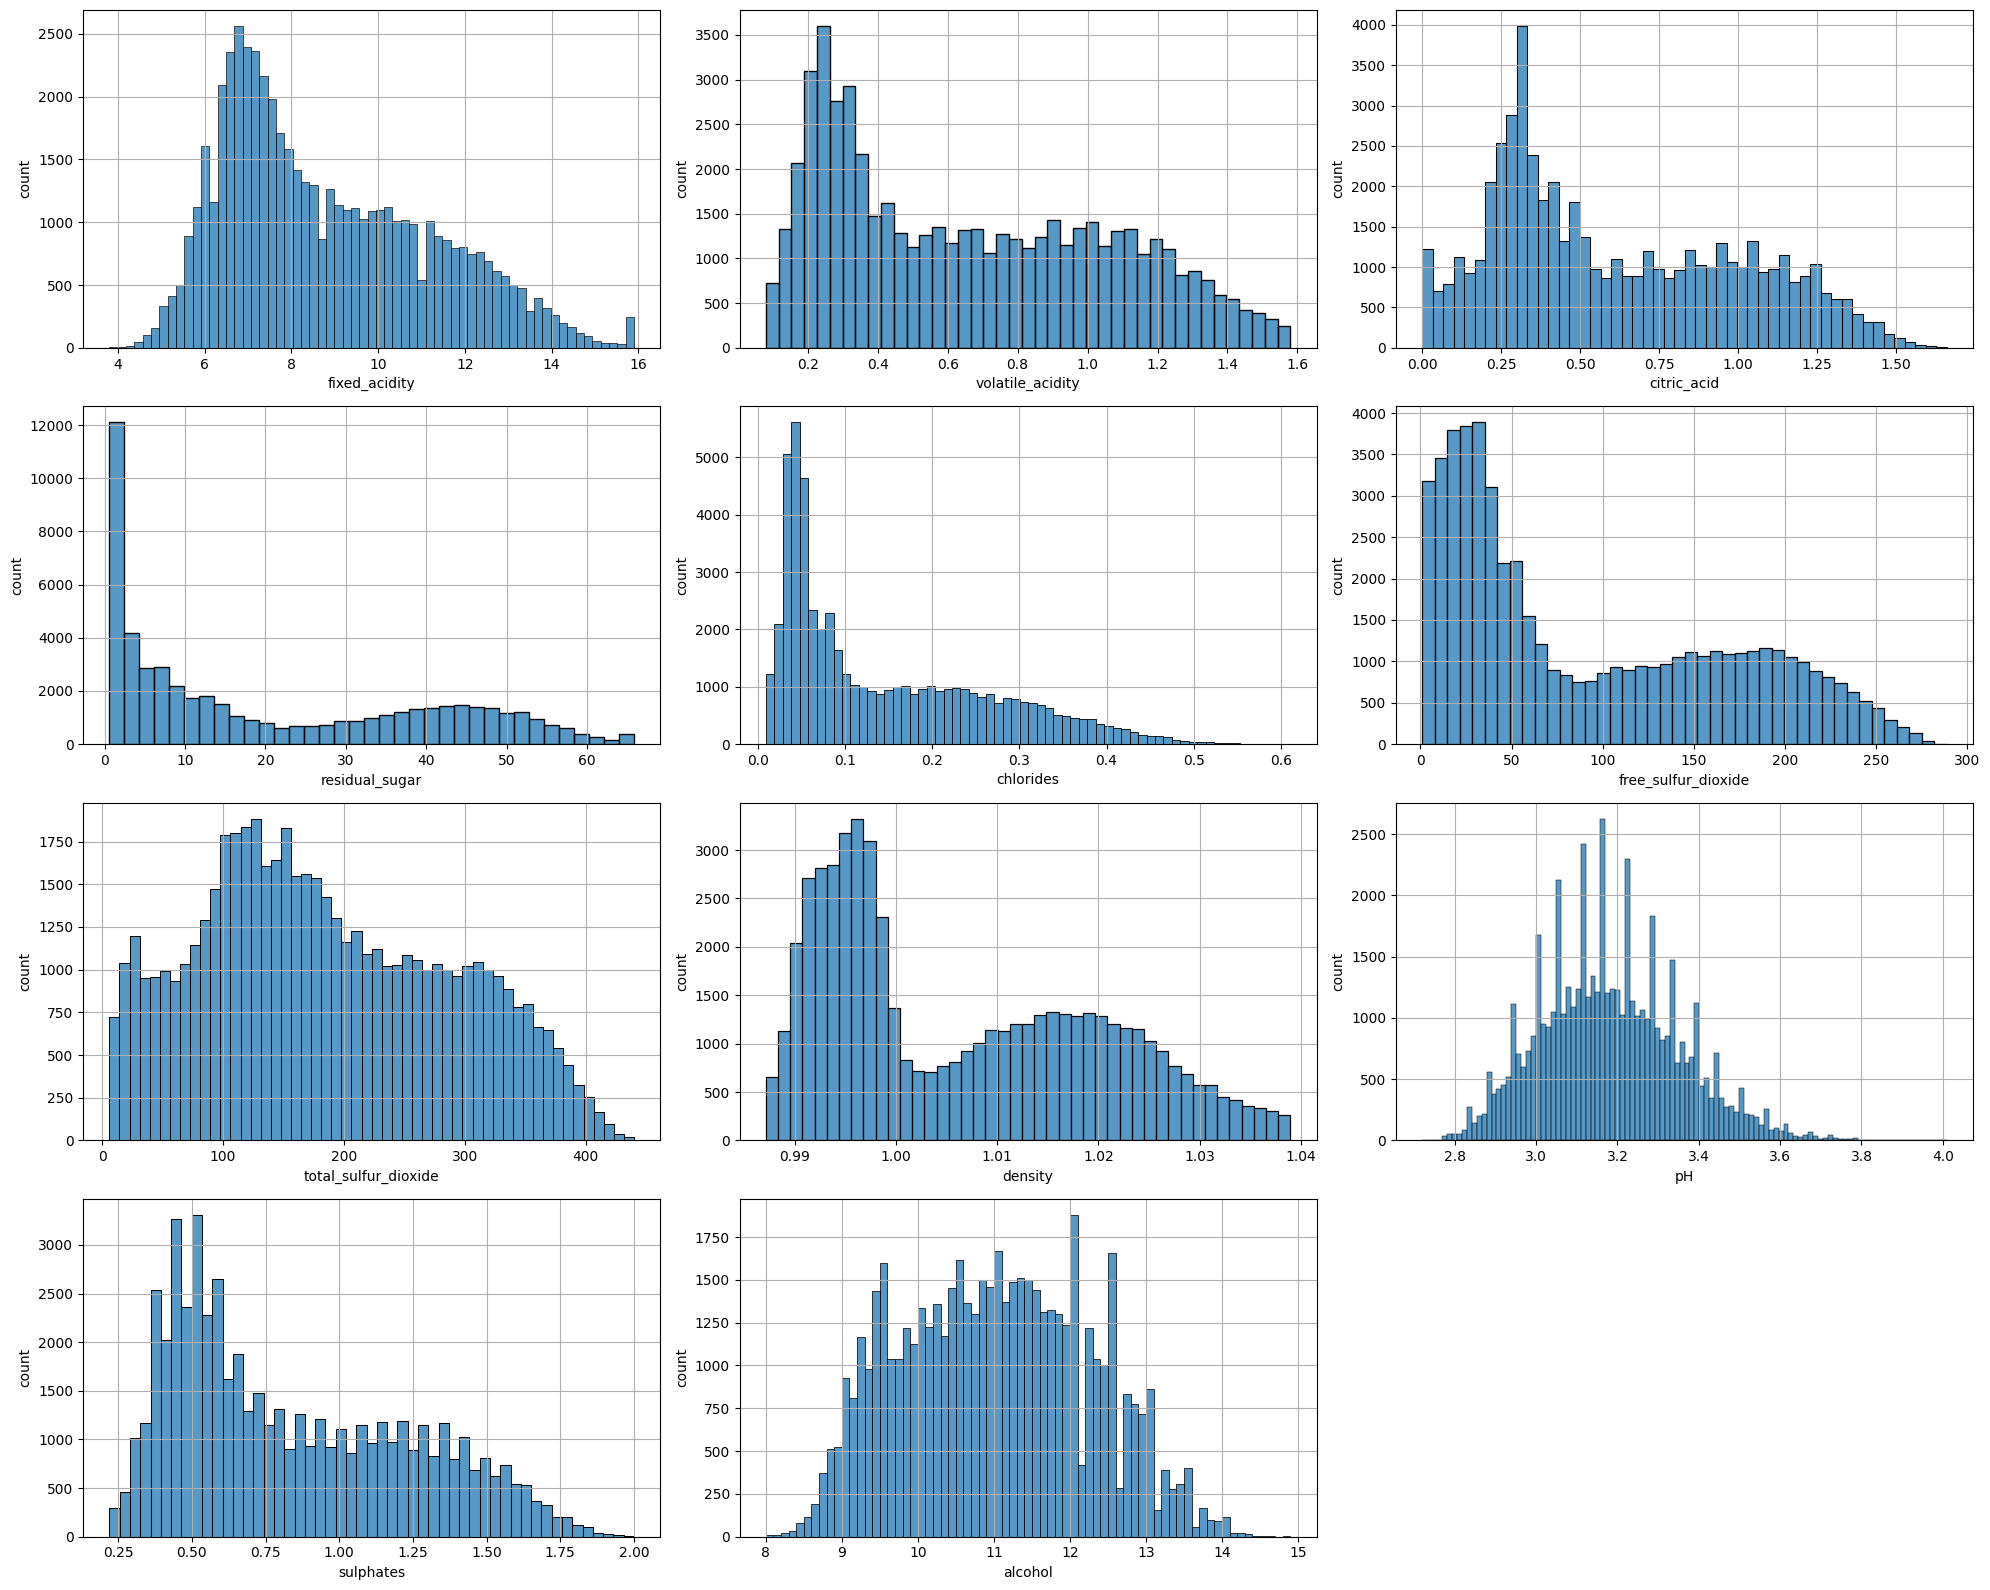

In [11]:
features = wines.drop(columns=['quality'], errors='ignore')

plt.figure(figsize = (20, 16))
for i, col in enumerate(list(features.columns.values)):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data = features[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.grid()
    plt.tight_layout()

plt.show()

**KDE to show the probability curve so we can observe the distribution of each feature**

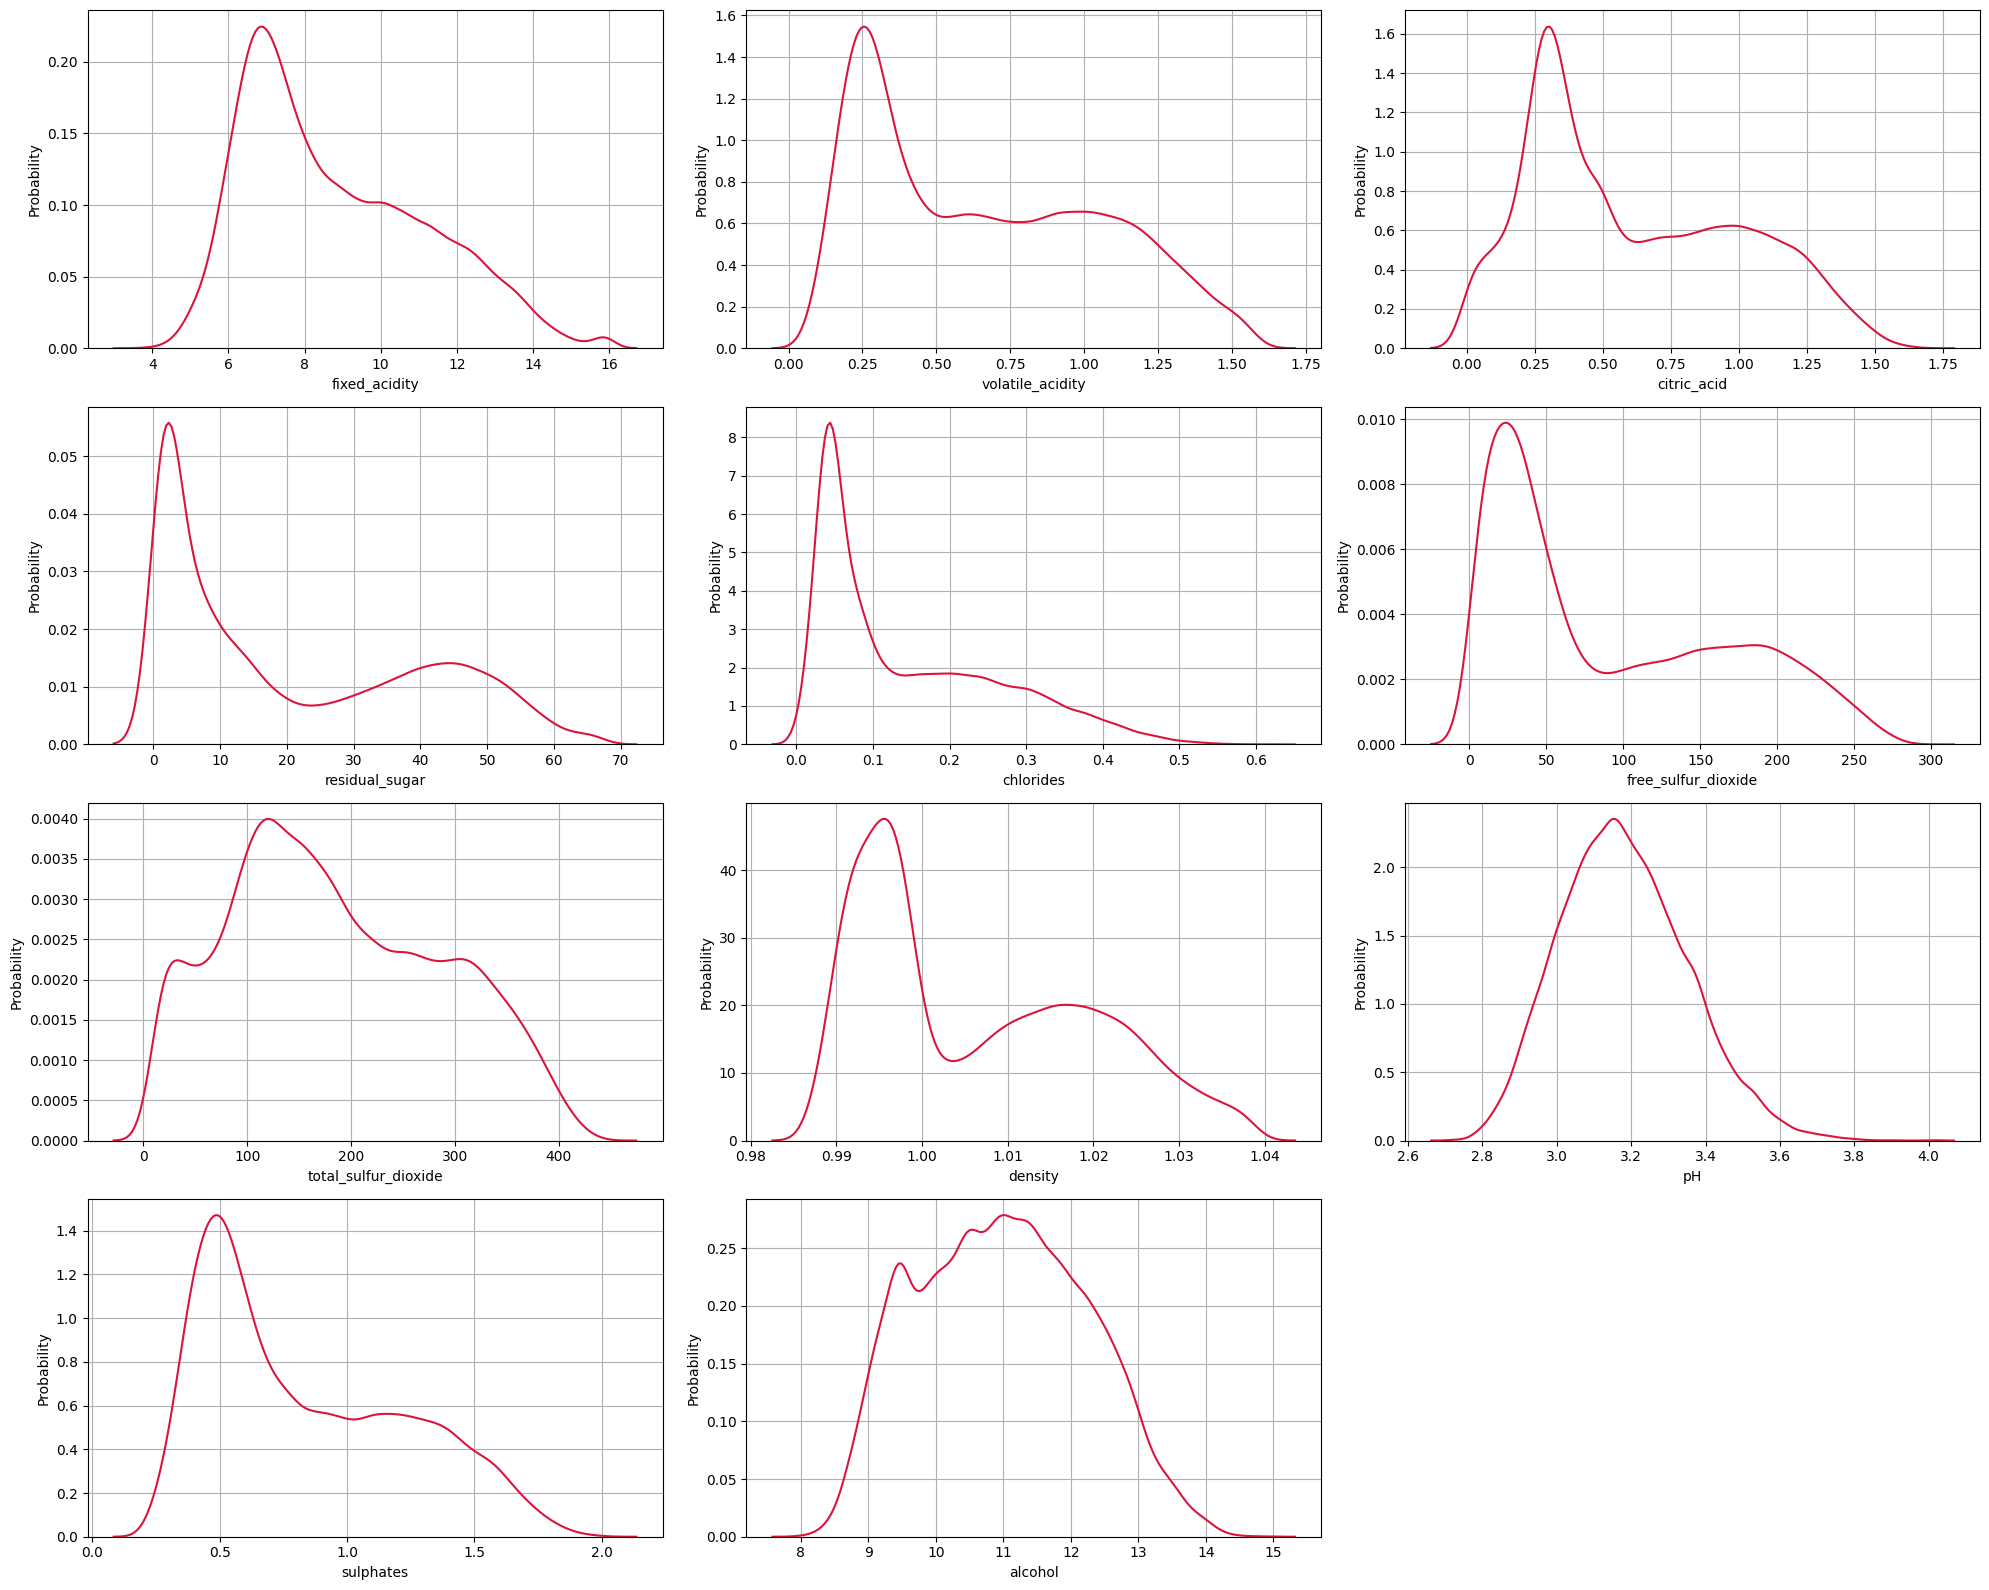

In [12]:
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(features.columns.values)):
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(data = features[col], color = 'crimson')
    plt.xlabel(col)
    plt.ylabel('Probability')
    plt.grid()
    plt.tight_layout()

plt.show()

**We use scatterplot to find if there has outliers that we need to remove**

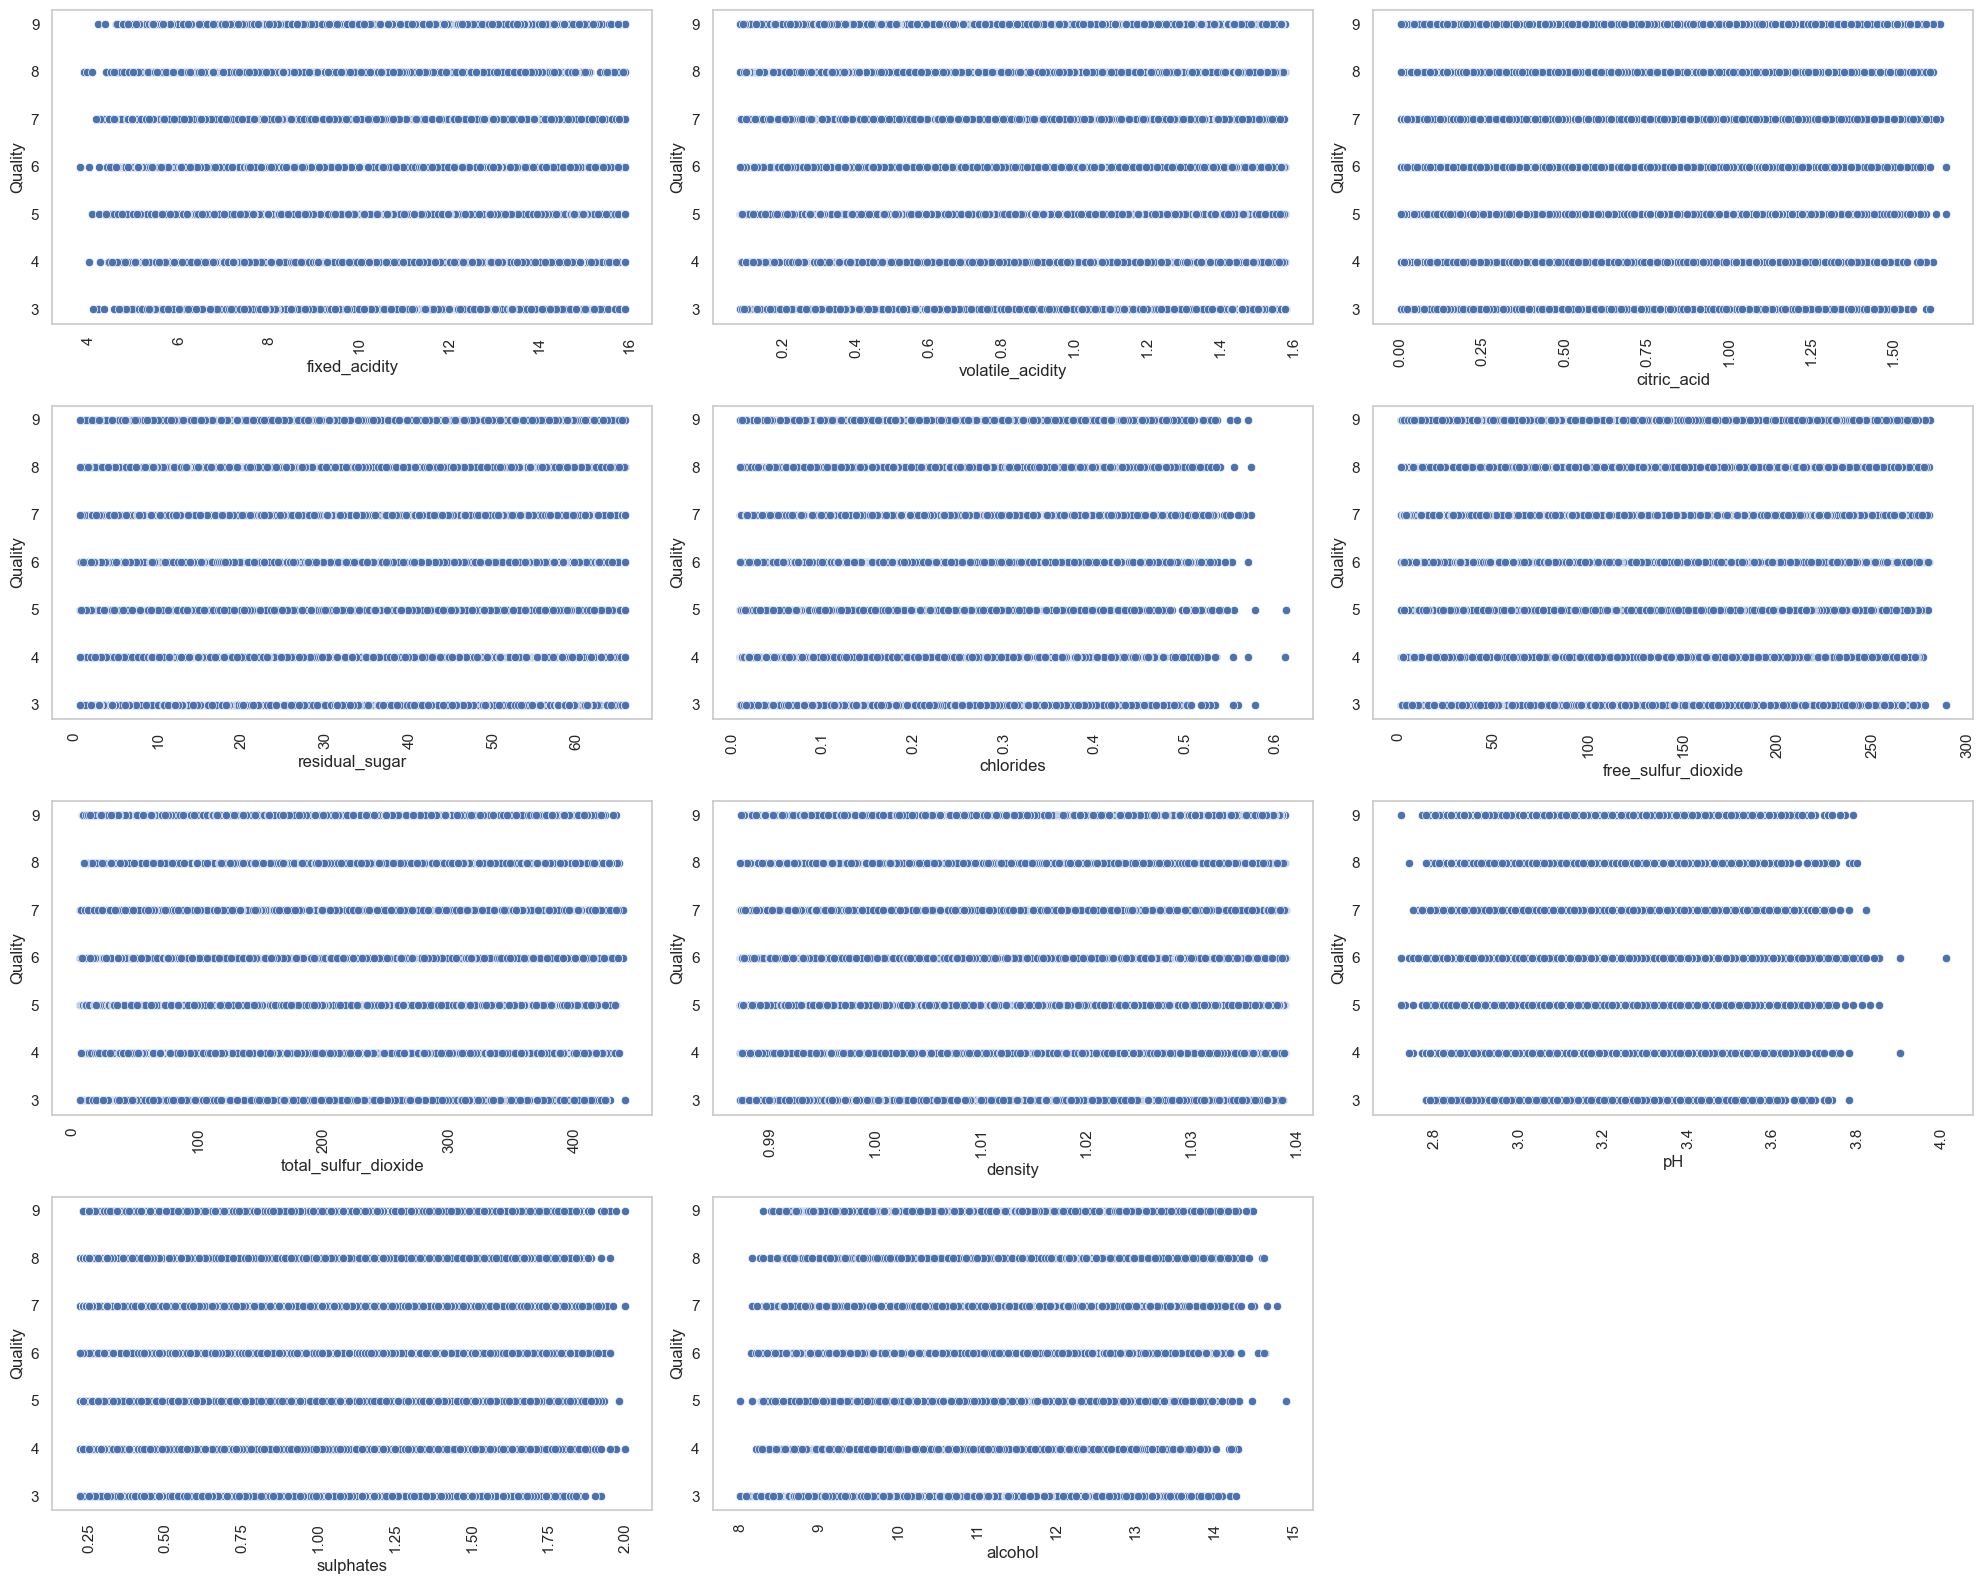

In [13]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(features.columns.values)):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x = wines[col], y = wines['quality'], data = wines)
    plt.xlabel(col)
    plt.ylabel('Quality')
    plt.xticks(rotation=90)
    plt.grid()
    plt.tight_layout()

plt.show()

**There has some outliers, so we need to remove**

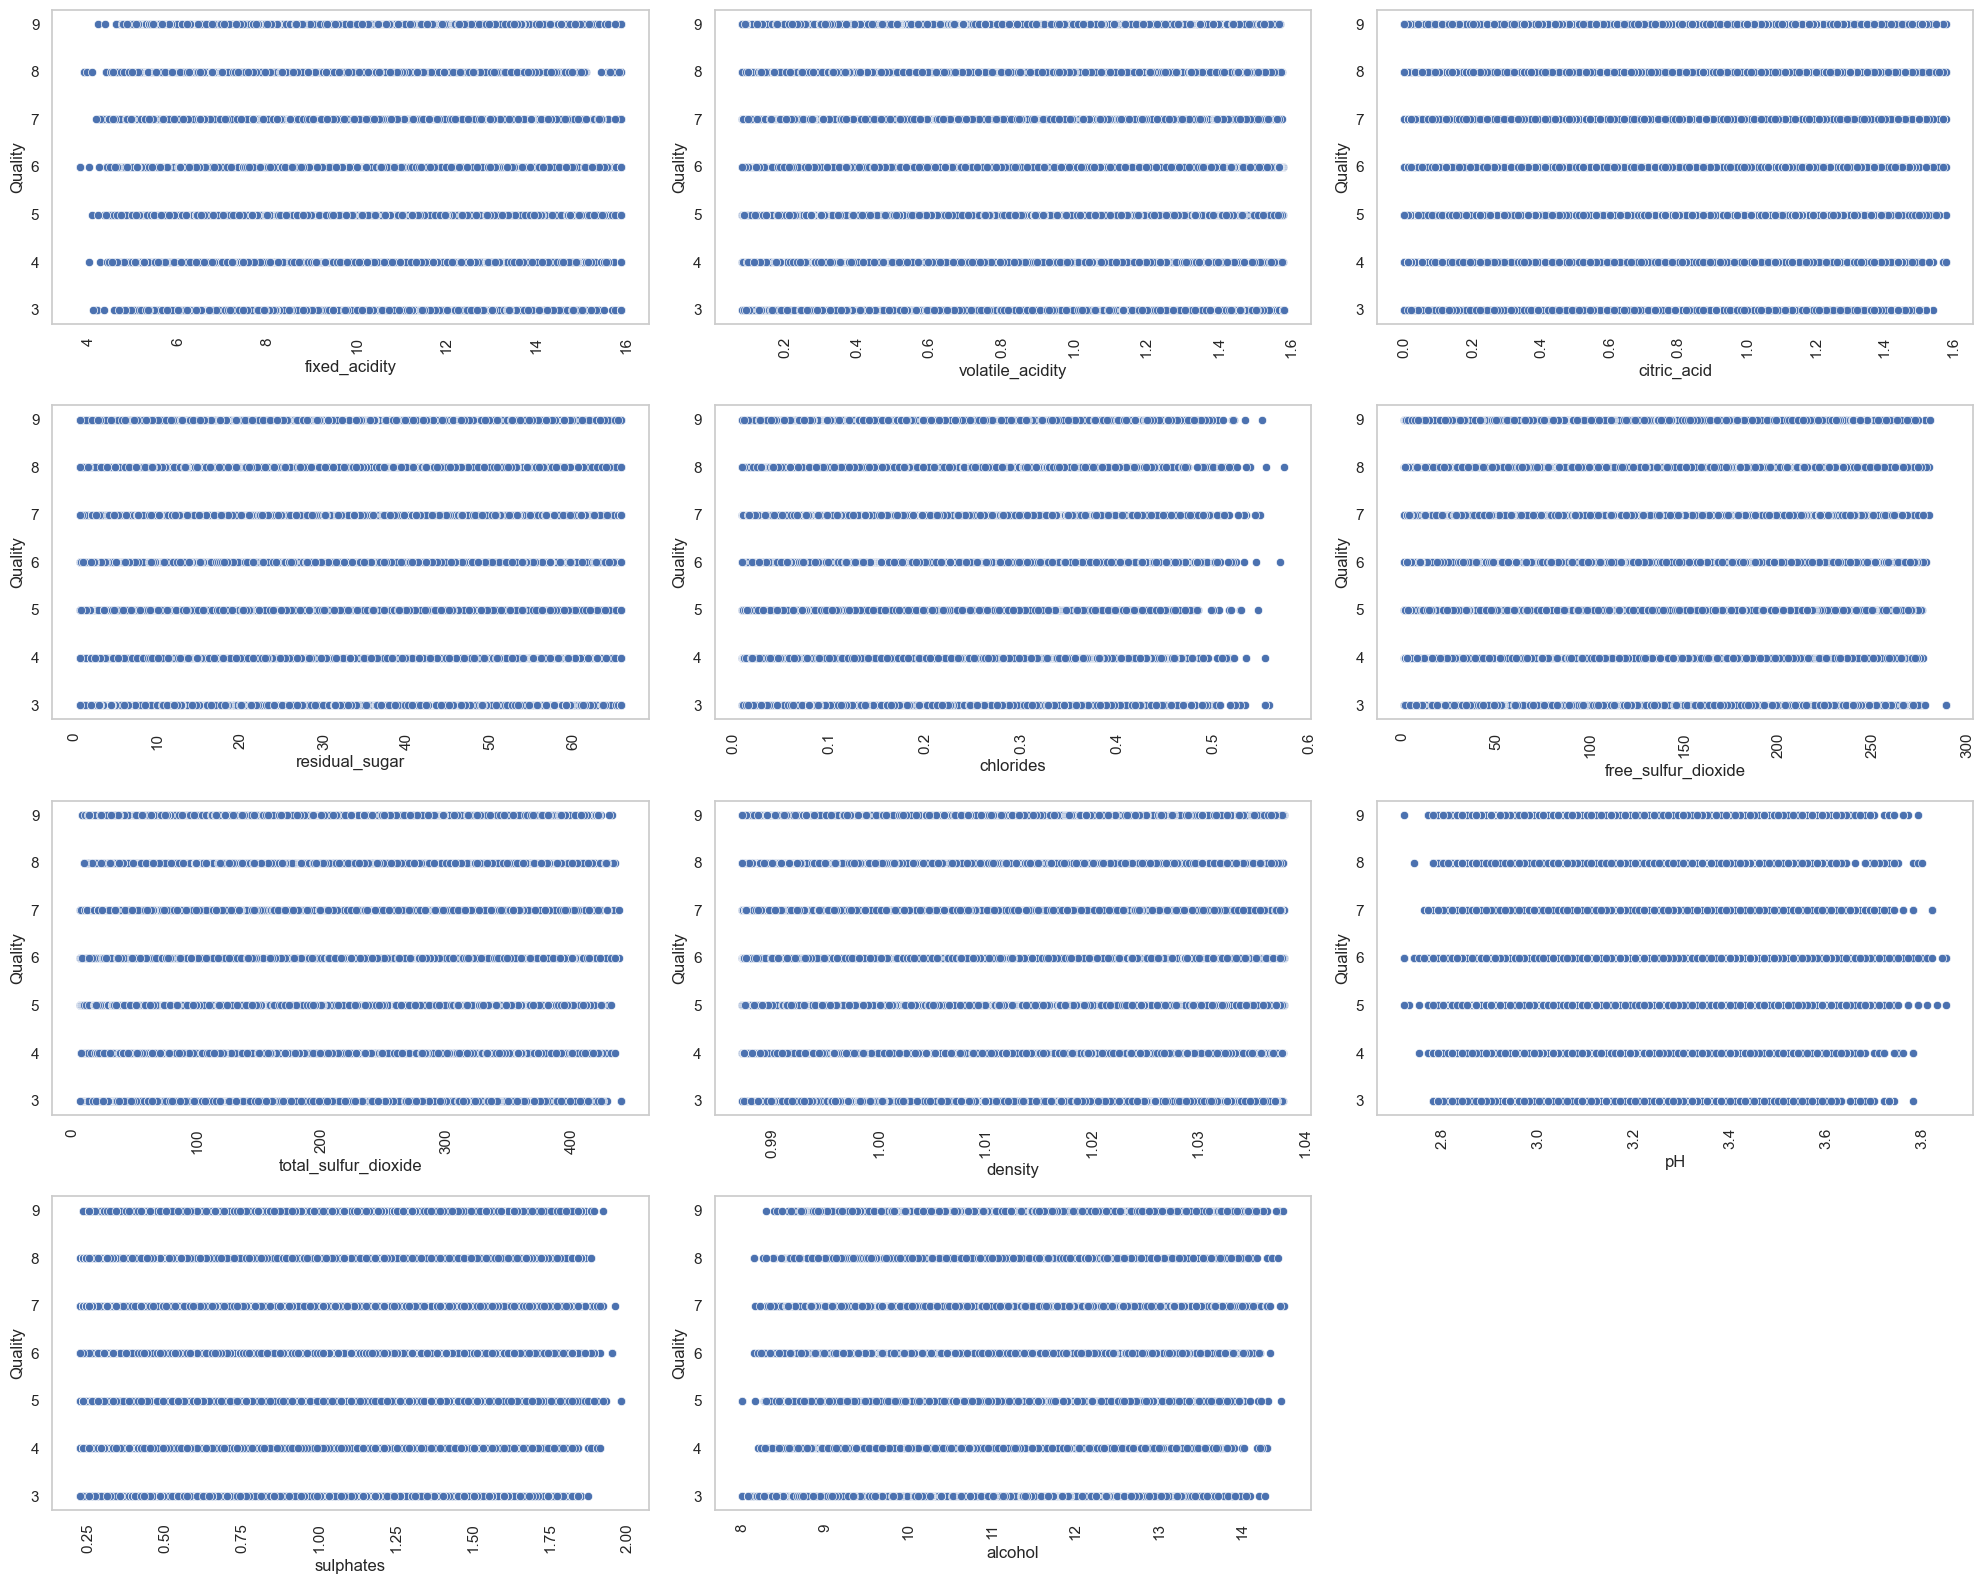

In [14]:
# Remove rows where alcohol > 15
wines = wines.drop(wines[wines['pH'] > 3.85].index)
wines = wines.drop(wines[wines['chlorides'] > 0.6].index)
wines = wines.drop(wines[wines['alcohol'] > 14.5].index)
wines = wines.drop(wines[wines['density'] > 1.038].index)
wines = wines.drop(wines[wines['citric_acid'] > 1.58].index)

sns.set(style = 'whitegrid')
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(features.columns.values)):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x = wines[col], y = wines['quality'], data = wines)
    plt.xlabel(col)
    plt.ylabel('Quality')
    plt.xticks(rotation=90)
    plt.grid()
    plt.tight_layout()

plt.show()


In [16]:

def LogisticRegression_model(x_train, x_test, y_train, y_test):
    # Standardize the data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Convert target variables to NumPy arrays
    y_train_np = y_train.to_numpy().ravel()
    y_test_np = y_test.to_numpy().ravel()

    # Logistic Regression
    log_reg_model = LogisticRegression(max_iter=1000)
    log_reg_model.fit(x_train, y_train_np)
    log_reg_pred = log_reg_model.predict(x_test)
    log_reg_acc = accuracy_score(y_test_np, log_reg_pred)
    print("Logistic Regression Accuracy: {:.2f}%".format(log_reg_acc * 100))
    print(classification_report(y_test_np, log_reg_pred))
    return log_reg_model

In [17]:

def DecisionTreeClassifier_model(x_train, x_test, y_train, y_test):
    # Convert target variables to NumPy arrays
    y_train_np = y_train.to_numpy().ravel()
    y_test_np = y_test.to_numpy().ravel()

    # Decision Tree
    dec_tree_model = DecisionTreeClassifier(max_depth=10)
    dec_tree_model.fit(x_train, y_train_np)
    dec_tree_pred = dec_tree_model.predict(x_test)
    dec_tree_acc = accuracy_score(y_test_np, dec_tree_pred)
    print("Decision Tree Accuracy: {:.2f}%".format(dec_tree_acc * 100))
    return dec_tree_model

In [18]:
def RandomForestClassifier_model(x_train, x_test, y_train, y_test):
    # Convert target variables to NumPy arrays
    y_train_np = y_train.to_numpy().ravel()
    y_test_np = y_test.to_numpy().ravel()

    # Random Forest
    rand_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10)
    rand_forest_model.fit(x_train, y_train_np)
    rand_forest_pred = rand_forest_model.predict(x_test)
    rand_forest_acc = accuracy_score(y_test_np, rand_forest_pred)
    print("Random Forest Accuracy: {:.2f}%".format(rand_forest_acc * 100))
    return rand_forest_model

In [19]:
def XGBoot_classifier(x_train, x_test, y_train, y_test):
    # Standardize and convert to numpy arrays
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    y_train_np = y_train.to_numpy().ravel() if hasattr(y_train, 'to_numpy') else y_train.ravel()
    y_test_np = y_test.to_numpy().ravel() if hasattr(y_test, 'to_numpy') else y_test.ravel()
    
    # Get unique class values
    unique_classes = np.unique(np.concatenate([y_train_np, y_test_np]))
    print(f"Unique classes in data: {unique_classes}")
    
    # Create a mapper to transform classes to 0-based indices
    class_mapper = {original: idx for idx, original in enumerate(sorted(unique_classes))}
    reverse_mapper = {idx: original for original, idx in class_mapper.items()}
    
    # Apply the mapping
    y_train_mapped = np.array([class_mapper[y] for y in y_train_np])
    y_test_mapped = np.array([class_mapper[y] for y in y_test_np])
    
    print(f"Original classes mapped to: {sorted(np.unique(y_train_mapped))}")
    
    # Train XGBoost with the correctly adjusted labels
    xgb_model = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=50,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=3,
        gamma=0.1,
        random_state=42
    )

    # Train the model
    xgb_model.fit(x_train_scaled, y_train_mapped)

    # Make predictions
    xgb_pred_mapped = xgb_model.predict(x_test_scaled)
    
    # Convert predictions back to original class labels for evaluation
    xgb_pred = np.array([reverse_mapper[y] for y in xgb_pred_mapped])
    
    xgb_acc = accuracy_score(y_test_np, xgb_pred)
    print("XGBoost Accuracy: {:.2f}%".format(xgb_acc * 100))
    
    # Return the accuracy and model
    return x_test_scaled, x_train_scaled, xgb_model

**Create smaller dataset for comparison. We only keep the variables have more than 0.045 correlation with quality**

In [20]:
wines_small = wines.drop(['fixed_acidity', 'volatile_acidity', 'total_sulfur_dioxide', 'density', 'pH'], axis = 1)
wines_small.head()

,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,sulphates,alcohol,quality
0,0.66,2.20,0.074,10.0,0.57,9.0,3
1,0.49,2.10,0.200,5.0,0.63,8.4,3
2,0.00,4.25,0.097,5.0,0.54,10.7,3
3,0.42,1.50,0.145,34.0,0.86,9.9,3
4,0.02,3.40,0.084,6.0,0.49,11.0,3


**Shuffle data and split dataset to independent data and target data**

In [21]:
wines_small = wines_small.sample(frac=1).reset_index(drop=True)
x = wines_small.drop(['quality'], axis = 1)
y = wines_small.filter(['quality'], axis = 1)
print(x.head())
print()
print(y.head())


   citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  sulphates  \
0         0.33            2.50      0.026                 31.0       0.50   
1         0.10            0.88      0.055                  6.6       0.41   
2         0.06            2.10      0.080                  8.0       0.71   
3         0.24            0.99      0.027                 82.1       0.54   
4         0.55            2.80      0.081                 35.0       0.92   

     alcohol  
0  11.300000  
1   9.190049  
2   9.600000  
3   9.984763  
4  10.800000  

   quality
0        7
1        7
2        5
3        5
4        7


**Splitting the dataset into 80% training and 20% testing**

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (42952, 6)
Shape of x_test: (10739, 6)
Shape of y_train: (42952, 1)
Shape of y_test: (10739, 1)


**RUN models on smaller features**

In [23]:
log_reg_model_small_features = LogisticRegression_model(x_train, x_test, y_train, y_test)
dec_tree_model_small_features = DecisionTreeClassifier_model(x_train, x_test, y_train, y_test)
rand_forest_model_small_features = RandomForestClassifier_model(x_train, x_test, y_train, y_test)
x_test_scaled, x_train_scaled, xgb_model_model_small_features = XGBoot_classifier(x_train, x_test, y_train, y_test)


Logistic Regression Accuracy: 31.39%
              precision    recall  f1-score   support

           3       0.20      0.15      0.17      1006
           4       0.15      0.05      0.07      1039
           5       0.41      0.41      0.41      2401
           6       0.39      0.65      0.48      2677
           7       0.15      0.09      0.11      1667
           8       0.15      0.08      0.10      1035
           9       0.17      0.25      0.21       914

    accuracy                           0.31     10739
   macro avg       0.23      0.24      0.22     10739
weighted avg       0.27      0.31      0.28     10739

Decision Tree Accuracy: 36.38%
Random Forest Accuracy: 40.84%
Unique classes in data: [3 4 5 6 7 8 9]
Original classes mapped to: [0, 1, 2, 3, 4, 5, 6]
XGBoost Accuracy: 58.56%


**Running models on with all the features in the dataset**

In [27]:
wines = wines.sample(frac=1).reset_index(drop=True)
x = wines.drop(['quality'], axis = 1)
y = wines.filter(['quality'], axis = 1)

x = x.dropna()
# Ensure y matches x's indices after dropping values
y = y.loc[x.index] 
# adjust labels to start from 0 
y = y - y.min()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 42)

log_reg_model_all_features = LogisticRegression_model(x_train, x_test, y_train, y_test)
decision_tree_reg_model_all_features = DecisionTreeClassifier_model(x_train, x_test, y_train, y_test)
random_forest_reg_model_all_features = RandomForestClassifier_model(x_train, x_test, y_train, y_test)
x_test_scaled, x_train_scaled, xgboost_model_all_features = XGBoot_classifier(x_train, x_test, y_train, y_test)


Logistic Regression Accuracy: 32.47%
              precision    recall  f1-score   support

           0       0.20      0.14      0.16       976
           1       0.18      0.08      0.11      1077
           2       0.41      0.45      0.43      2351
           3       0.40      0.64      0.50      2761
           4       0.15      0.08      0.11      1644
           5       0.18      0.14      0.16      1003
           6       0.18      0.17      0.18       927

    accuracy                           0.32     10739
   macro avg       0.24      0.24      0.23     10739
weighted avg       0.28      0.32      0.29     10739

Decision Tree Accuracy: 37.42%
Random Forest Accuracy: 43.91%
Unique classes in data: [0 1 2 3 4 5 6]
Original classes mapped to: [0, 1, 2, 3, 4, 5, 6]
XGBoost Accuracy: 59.17%


Performed SHAP Analysis on a sample of the test data to identify the most influential features in the XGBoost model's prediction.

In [ ]:
# Recreate DataFrame with original feature names
x_test_sample = pd.DataFrame(x_test_scaled, columns=x.columns).sample(300, random_state=42)

# Recreate SHAP explainer
explainer = shap.Explainer(xgboost_model_all_features, x_train_scaled)

# Calculate SHAP values on a small sample
shap_values = explainer(x_test_sample)

# Plot summary with proper feature names
shap.summary_plot(shap_values, x_test_sample)

 47%|=========           | 979/2100 [02:55<03:20]       